In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
num_classes = 10
baseMapNum = 32
weight_decay = 1e-4
IMG_SIZE = 28
#model
model = Sequential()
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(baseMapNum, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(2*baseMapNum, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(4*baseMapNum, (5,5), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(IMG_SIZE,IMG_SIZE,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(5*num_classes, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [3]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
__________

In [4]:
#preparing train data
final = pd.read_csv('../input/facerec/train.csv')
final = final.drop(columns=["Unnamed: 0"])
final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352
0,0.000000,0.003922,0.000000,0.074510,0.078431,0.043137,0.454902,0.462745,0.384314,0.592157,0.592157,0.474510,0.650980,0.654902,0.490196,0.517647,0.505882,0.305882,0.623529,0.600000,0.368627,0.654902,0.619608,0.372549,0.509804,0.470588,0.219608,0.513725,0.466667,0.215686,0.501961,0.454902,0.203922,0.494118,0.447059,0.188235,0.482353,0.447059,0.180392,0.486275,...,0.517647,0.501961,0.223529,0.537255,0.525490,0.258824,0.537255,0.517647,0.270588,0.564706,0.545098,0.305882,0.615686,0.592157,0.360784,0.682353,0.666667,0.435294,0.721569,0.701961,0.486275,0.705882,0.698039,0.486275,0.725490,0.709804,0.517647,0.560784,0.556863,0.384314,0.556863,0.549020,0.392157,0.584314,0.580392,0.447059,0.545098,0.537255,0.415686,0
1,0.215686,0.219608,0.235294,0.196078,0.207843,0.227451,0.211765,0.235294,0.254902,0.172549,0.203922,0.231373,0.149020,0.192157,0.207843,0.243137,0.274510,0.274510,0.494118,0.521569,0.494118,0.898039,0.898039,0.835294,0.701961,0.666667,0.560784,0.521569,0.458824,0.317647,0.607843,0.517647,0.337255,0.580392,0.474510,0.278431,0.600000,0.478431,0.270588,0.560784,...,0.847059,0.725490,0.517647,0.858824,0.764706,0.584314,0.850980,0.772549,0.611765,0.870588,0.800000,0.639216,0.921569,0.858824,0.713725,0.952941,0.905882,0.772549,0.905882,0.866667,0.749020,0.858824,0.839216,0.741176,0.898039,0.886275,0.803922,0.980392,0.980392,0.909804,0.984314,0.984314,0.929412,0.980392,1.000000,0.941176,0.988235,1.000000,0.956863,2
2,0.443137,0.466667,0.423529,0.474510,0.482353,0.435294,0.564706,0.560784,0.505882,0.627451,0.596078,0.529412,0.576471,0.529412,0.435294,0.513725,0.458824,0.349020,0.513725,0.458824,0.317647,0.513725,0.466667,0.309804,0.454902,0.435294,0.243137,0.462745,0.447059,0.239216,0.415686,0.411765,0.184314,0.411765,0.407843,0.168627,0.462745,0.454902,0.203922,0.447059,...,0.541176,0.564706,0.349020,0.588235,0.592157,0.439216,0.666667,0.658824,0.541176,0.717647,0.709804,0.588235,0.694118,0.686275,0.564706,0.607843,0.615686,0.498039,0.580392,0.584314,0.482353,0.721569,0.725490,0.647059,0.945098,0.937255,0.894118,0.937255,0.929412,0.925490,0.933333,0.917647,0.937255,0.913725,0.909804,0.949020,0.909804,0.901961,0.949020,0
3,0.784314,0.764706,0.729412,0.650980,0.619608,0.568627,0.525490,0.474510,0.388235,0.603922,0.533333,0.419608,0.619608,0.533333,0.372549,0.701961,0.600000,0.419608,0.619608,0.509804,0.325490,0.549020,0.439216,0.254902,0.509804,0.407843,0.227451,0.458824,0.364706,0.200000,0.439216,0.345098,0.203922,0.447059,0.360784,0.223529,0.423529,0.333333,0.207843,0.380392,...,0.596078,0.513725,0.364706,0.643137,0.568627,0.423529,0.682353,0.607843,0.470588,0.674510,0.603922,0.482353,0.517647,0.458824,0.356863,0.235294,0.188235,0.117647,0.243137,0.203922,0.164706,0.290196,0.266667,0.247059,0.400000,0.380392,0.384314,0.796078,0.784314,0.792157,0.976471,0.972549,0.988235,0.992157,0.996078,1.000000,0.976471,0.980392,0.996078,0
4,0.788235,0.745098,0.756863,0.784314,0.737255,0.737255,0.768627,0.705882,0.682353,0.850980,0.784314,0.733333,0.878431,0.803922,0.721569,0.862745,0.788235,0.682353,0.803922,0.733333,0.611765,0.549020,0.482353,0.352941,0.231373,0.184314,0.050980,0.235294,0.188235,0.054902,0.254902,0.203922,0.054902,0.286275,0.219608,0.066667,0.313725,0.239216,0.062745,0.368627,...,0.635294,0.564706,0.317647,0.733333,0.666667,0.443137,0.827451,0.756863,0.549020,0.870588,0.803922,0.611765,0.862745,0.788235,0.619608,0.898039,0.831373,0.678431,0.984314,0.905882,0.784314,0.964706,0.898039,0.796078,0.878431,0.811765,0.737255,0.878431,0.811765,0.760784,0.941176,0.882353,0.847059,0.905882,0.858824,0.819608,0.917647,0.874510,0.843137,6


In [5]:
#preparing test data
fin = pd.read_csv('../input/facerec/test.csv')
fin = fin.drop(columns=["Unnamed: 0"])
fin.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2313,2314,2315,2316,2317,2318,2319,2320,2321,2322,2323,2324,2325,2326,2327,2328,2329,2330,2331,2332,2333,2334,2335,2336,2337,2338,2339,2340,2341,2342,2343,2344,2345,2346,2347,2348,2349,2350,2351,2352
0,0.000000,0.003922,0.000000,0.074510,0.078431,0.043137,0.454902,0.462745,0.384314,0.592157,0.592157,0.474510,0.650980,0.654902,0.490196,0.517647,0.505882,0.305882,0.623529,0.600000,0.368627,0.654902,0.619608,0.372549,0.509804,0.470588,0.219608,0.513725,0.466667,0.215686,0.501961,0.454902,0.203922,0.494118,0.447059,0.188235,0.482353,0.447059,0.180392,0.486275,...,0.517647,0.501961,0.223529,0.537255,0.525490,0.258824,0.537255,0.517647,0.270588,0.564706,0.545098,0.305882,0.615686,0.592157,0.360784,0.682353,0.666667,0.435294,0.721569,0.701961,0.486275,0.705882,0.698039,0.486275,0.725490,0.709804,0.517647,0.560784,0.556863,0.384314,0.556863,0.549020,0.392157,0.584314,0.580392,0.447059,0.545098,0.537255,0.415686,0
1,0.443137,0.466667,0.423529,0.474510,0.482353,0.435294,0.564706,0.560784,0.505882,0.627451,0.596078,0.529412,0.576471,0.529412,0.435294,0.513725,0.458824,0.349020,0.513725,0.458824,0.317647,0.513725,0.466667,0.309804,0.454902,0.435294,0.243137,0.462745,0.447059,0.239216,0.415686,0.411765,0.184314,0.411765,0.407843,0.168627,0.462745,0.454902,0.203922,0.447059,...,0.541176,0.564706,0.349020,0.588235,0.592157,0.439216,0.666667,0.658824,0.541176,0.717647,0.709804,0.588235,0.694118,0.686275,0.564706,0.607843,0.615686,0.498039,0.580392,0.584314,0.482353,0.721569,0.725490,0.647059,0.945098,0.937255,0.894118,0.937255,0.929412,0.925490,0.933333,0.917647,0.937255,0.913725,0.909804,0.949020,0.909804,0.901961,0.949020,0
2,0.647059,0.682353,0.760784,0.811765,0.847059,0.925490,0.439216,0.466667,0.541176,0.690196,0.717647,0.784314,0.839216,0.866667,0.925490,0.901961,0.917647,0.960784,0.905882,0.917647,0.949020,0.615686,0.619608,0.635294,0.392157,0.372549,0.376471,0.329412,0.294118,0.282353,0.341176,0.294118,0.278431,0.368627,0.298039,0.270588,0.325490,0.235294,0.203922,0.313725,...,0.498039,0.517647,0.403922,0.501961,0.505882,0.372549,0.439216,0.435294,0.301961,0.447059,0.450980,0.317647,0.490196,0.498039,0.380392,0.650980,0.662745,0.564706,0.847059,0.866667,0.784314,0.878431,0.898039,0.839216,0.862745,0.886275,0.843137,0.886275,0.917647,0.890196,0.917647,0.945098,0.933333,0.937255,0.960784,0.956863,0.929412,0.949020,0.952941,6
3,0.658824,0.572549,0.431373,0.647059,0.560784,0.419608,0.615686,0.541176,0.403922,0.588235,0.513725,0.376471,0.529412,0.470588,0.341176,0.486275,0.427451,0.298039,0.470588,0.419608,0.294118,0.486275,0.435294,0.309804,0.454902,0.415686,0.282353,0.447059,0.407843,0.274510,0.443137,0.400000,0.250980,0.431373,0.388235,0.239216,0.435294,0.388235,0.223529,0.431373,...,0.345098,0.290196,0.176471,0.301961,0.254902,0.160784,0.294118,0.243137,0.156863,0.290196,0.247059,0.160784,0.278431,0.235294,0.149020,0.207843,0.184314,0.094118,0.333333,0.309804,0.219608,0.309804,0.290196,0.207843,0.317647,0.298039,0.215686,0.356863,0.337255,0.254902,0.380392,0.360784,0.278431,0.352941,0.329412,0.239216,0.313725,0.290196,0.200000,2
4,0.937255,0.901961,0.866667,0.870588,0.831373,0.792157,0.898039,0.850980,0.803922,0.615686,0.556863,0.494118,0.352941,0.286275,0.211765,0.364706,0.282353,0.196078,0.325490,0.231373,0.121569,0.345098,0.235294,0.113725,0.333333,0.231373,0.086275,0.345098,0.247059,0.082353,0.337255,0.247059,0.066667,0.329412,0.247059,0.047059,0.333333,0.270588,0.062745,0.364706,...,0.917647,0.858824,0.678431,0.901961,0.839216,0.658824,0.921569,0.858824,0.690196,0.945098,0.890196,0.725490,0.945098,0.901961,0.752941,0.921569,0.886275,0.752941,0.862745,0.839216,0.725490,0.796078,0.792157,0.690196,0.749020,0.752941,0.674510,0.819608,0.831373,0.768627,0.909804,0.937255,0.886275,0.984314,1.000000,0.976471,0.980392,1.000000,0.984314,0


In [6]:
#Train/ Fit the model on train data
Y = final["2352"]
X = final.drop(columns=["2352"])
Y = tf.keras.utils.to_categorical(Y,10)
X = np.array(X)
X = X.reshape(X.shape[0],28,28,3)
Y_v = fin["2352"]
X_v = fin.drop(columns=["2352"])
Y_v = tf.keras.utils.to_categorical(Y_v,10)
X_v = np.array(X_v)
X_v = X_v.reshape(X_v.shape[0],28,28,3)


In [8]:
history = model.fit(X,Y,batch_size=500,epochs =25,validation_data=(X_v,Y_v))

Train on 23705 samples, validate on 9778 samples
Epoch 1/25
23705/23705 [==============================] - 13s 529us/step - loss: 1.2605 - acc: 0.5849 - val_loss: 1.2996 - val_acc: 0.5673
Epoch 2/25
23705/23705 [==============================] - 12s 526us/step - loss: 1.0796 - acc: 0.6467 - val_loss: 1.0912 - val_acc: 0.6260
Epoch 3/25
23705/23705 [==============================] - 13s 528us/step - loss: 0.9745 - acc: 0.6795 - val_loss: 1.0293 - val_acc: 0.6397
Epoch 4/25
23705/23705 [==============================] - 13s 528us/step - loss: 0.8804 - acc: 0.7142 - val_loss: 0.9265 - val_acc: 0.6799
Epoch 5/25
23705/23705 [==============================] - 13s 528us/step - loss: 0.7953 - acc: 0.7409 - val_loss: 0.8710 - val_acc: 0.6980
Epoch 6/25
23705/23705 [==============================] - 13s 528us/step - loss: 0.7284 - acc: 0.7663 - val_loss: 0.7493 - val_acc: 0.7386
Epoch 7/25
23705/23705 [==============================] - 13s 528us/step - loss: 0.6719 - acc: 0.7843 - val_loss: 0.6

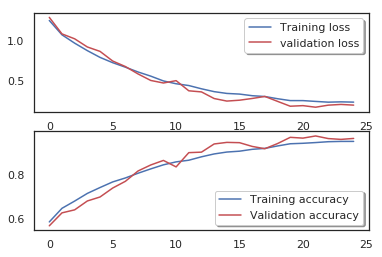

In [10]:
#import matplotlib.plt 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

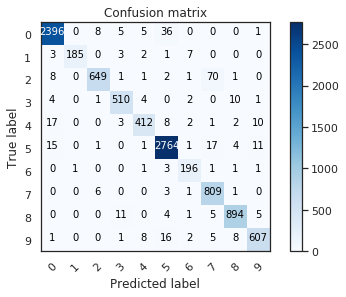

In [11]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_v)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_v,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [ ]:
#Evaluating on test data
model.save('weights.h5')
pred= model.evaluate(X_v,Y_v)
print("On test data:")
print('Loss: ',pred[0])
acc = pred[1]*100
print('Accuracy: ',acc,"%")

In [ ]:
#Hurray!